<a href="https://colab.research.google.com/github/neXT1me/ClassificationDiabetes/blob/main/ClassificationDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean
import datetime

# Классификация сахарного диабета

In [ ]:
def find_mismatched_data_indices(df):
    """
    Находит индексы строк с данными, которые не соответствуют типу столбца.
    """
    mismatched_data = {}

    for column in df.columns:
        expected_type = df[column].dtype
        if expected_type in ['int64', 'float64']:
            # Для числовых столбцов проверяем, что данные являются числами
            mismatched_rows = df[~df[column].apply(lambda x: isinstance(x, (int, float)))]
        else:
            # Для нечисловых столбцов проверяем, что данные являются строками
            mismatched_rows = df[~df[column].apply(lambda x: isinstance(x, str))]

        if not mismatched_rows.empty:
            mismatched_data[column] = mismatched_rows.index.tolist()

    return mismatched_data

In [ ]:
# Загрузка данных о диабете
data = pd.read_excel('/content/drive/MyDrive/Магистратура/Интеллектуальные методы извлечения знаний/Практика 1/diabetes.xlsx')
data

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.34,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
# Проверка данных на тип
for i in data.columns:
  print(i, end='\t')
  print(type(data[i][0]))

Беременность	<class 'numpy.int64'>
Глюкоза	<class 'numpy.int64'>
АД	<class 'numpy.int64'>
Толщина КС	<class 'numpy.float64'>
Инсулин	<class 'numpy.float64'>
ИМТ	<class 'numpy.float64'>
Наследственность	<class 'str'>
Возраст	<class 'numpy.int64'>
Диагноз	<class 'numpy.int64'>


In [ ]:
# Поиск ошибочных значений
mistake_value = find_mismatched_data_indices(data)
mistake_value

{'Наследственность': [39, 147, 395, 445]}

In [ ]:
data.isnull().sum()

,0
Беременность,0
Глюкоза,0
АД,0
Толщина КС,0
Инсулин,0
ИМТ,0
Наследственность,0
Возраст,0
Диагноз,0


In [ ]:
# Заменим неподходящие данные на среднее значение данных в столбце
data_nasl = list(map(lambda x: np.float64(x),
                     filter(lambda x: type(x) != datetime.datetime,
                            data['Наследственность'])))
# Вычислим среднее значение
mean_nasl = mean(data_nasl)
# Заменим данные с типом datatime
for key, value in mistake_value.items():
  for i in value:
    data[key][i] = mean_nasl

data['Наследственность'] = pd.to_numeric(data['Наследственность'])

<ipython-input-12-7097b9bc10c5>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[key][i] = mean_nasl
<ipython-input-12-7097b9bc10c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [ ]:
# Повторная проверка данных
for i in data.columns:
  print(i, end='\t')
  print(type(data[i][0]))

Беременность	<class 'numpy.int64'>
Глюкоза	<class 'numpy.int64'>
АД	<class 'numpy.int64'>
Толщина КС	<class 'numpy.float64'>
Инсулин	<class 'numpy.float64'>
ИМТ	<class 'numpy.float64'>
Наследственность	<class 'numpy.float64'>
Возраст	<class 'numpy.int64'>
Диагноз	<class 'numpy.int64'>


In [ ]:
# Составим класс для реализации классификатора
class LogisticRegression:
  # Введем необходимые для класса данные
  def __init__(self, x_train, x_test, y_train, y_test) -> None:
    self.x_test = x_test
    self.x_train = x_train
    self.y_test = y_test
    self.y_train = y_train
    self.m, self.n = self.x_train.shape
    # Инициализация весов
    self.w = np.zeros(self.n)
    print(x_train.shape[1])

# Функция сигмойды
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

# Функция подсчета ошибок
  def compute_loss(self, y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Функция предсказывания диагнозы по параметрам
  def pred(self, X):
    return self.sigmoid(np.dot(X, self.w)) >= 0.5

# Обучение модели методом градиентного спуска
  def fit(self, lr=0.01, epochs=1000):
    loss_history = []
    accuracy_score_list = []
    for _ in range(epochs):
      # Вычисление сигмойды с весами
      z = np.dot(self.x_train, self.w)
      y_pred = self.sigmoid(z)

      # Вычисление градиента
      gradient = np.dot(self.x_train.T, (y_pred - self.y_train)) / self.m
      # Перерасчет весов
      self.w -= lr * gradient

      # Сохранение значения функции потерь и точности
      loss = self.compute_loss(self.y_train, y_pred)
      y_pred_testx = self.pred(self.x_test)
      accuracy_score_list.append(accuracy_score(self.y_test, y_pred_testx))
      loss_history.append(loss)

    return self.w, loss_history, accuracy_score_list


In [ ]:
X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = data.iloc[:, -1].values   # Последний столбец (целевая переменная)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 3. Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

8
2
Коэффициенты модели: [ 0.21343167  1.06227113 -0.27718181  0.07657705 -0.2455924   0.67623057
  0.26813662  0.39395572]
Точность на тестовой выборке: 0.6818181818181818


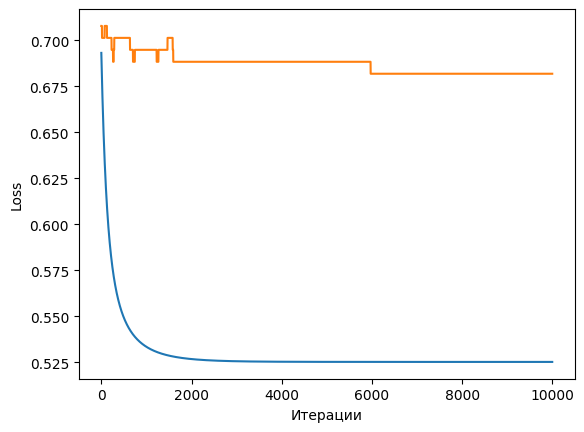

In [ ]:
LR = LogisticRegression(X_train, X_test, y_train, y_test)
w, loss, a = LR.fit(epochs=10000)

# # 5. Оценка модели
y_pred = LR.pred(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Коэффициенты модели:", w)
print("Точность на тестовой выборке:", accuracy)

# # 6. График функции потерь
import matplotlib.pyplot as plt
plt.plot(loss)
plt.plot(a)
plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Произведем отбор данных на основе таблицы корреляции
data.corr()

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
Беременность,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.021335,0.544341,0.221898
Глюкоза,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.130489,0.263514,0.466581
АД,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.042470,0.239528,0.065068
Толщина КС,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.159703,-0.113970,0.074752
Инсулин,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.184234,-0.042163,0.130548
ИМТ,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.119615,0.036242,0.292695
Наследственность,-0.021335,0.130489,0.042470,0.159703,0.184234,0.119615,1.000000,0.036299,0.171408
Возраст,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.036299,1.000000,0.238356
Диагноз,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.171408,0.238356,1.000000


Исключим Возраст и ИМТ, т.к. они сильно влияют на остальные признаки

In [ ]:
data_2 = data.copy()
data_2 = data_2.drop(columns=['ИМТ', 'Возраст'])
data_2

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,Наследственность,Диагноз
0,6,148,72,35.0,0.0,0.627,1
1,1,85,66,29.0,0.0,0.351,0
2,8,183,64,0.0,0.0,0.672,1
3,1,89,66,23.0,94.0,0.167,0
4,0,137,40,35.0,168.0,2.288,1
...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,0.171,0
764,2,122,70,27.0,0.0,0.340,0
765,5,121,72,23.0,112.0,0.245,0
766,1,126,60,0.0,0.0,0.349,1


In [ ]:
X = data_2.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = data_2.iloc[:, -1].values   # Последний столбец (целевая переменная)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 3. Разделение выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2.shape

(614, 6)

6


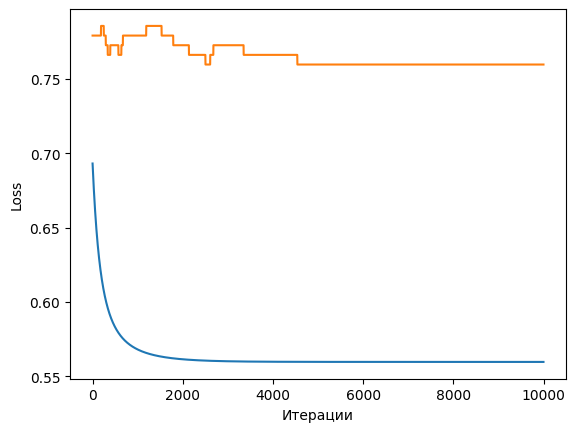

Коэффициенты модели: [ 0.39231316  1.20537507 -0.10068569  0.25851148 -0.26108042  0.2728778 ]
Точность на тестовой выборке: 0.7597402597402597


In [ ]:
LR_2 = LogisticRegression(X_train_2, X_test_2, y_train_2, y_test_2)
w_2, loss_2, a_test = LR_2.fit(epochs=10000)


import matplotlib.pyplot as plt
plt.plot(loss_2)
plt.plot(a_test)
plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.show()

# # 5. Оценка модели
y_pred_2 = LR_2.pred(X_test_2)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print("Коэффициенты модели:", w_2)
print("Точность на тестовой выборке:", accuracy_2)
